In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cristianoronaldo as cr7

In [2]:
df_mx = cr7.cargar_dataset('mexico_50.csv')
df_mx = df_mx.drop(df_mx.columns[0], axis=1)


In [3]:
nulos_mx = cr7.identificar_nulos(df_mx)
nulos_mx

('Nulos por columna:',
 id                                                  0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
 host_id                                             0
 host_since                                          3
 host_response_time                               3172
 host_response_rate                               3172
 host_acceptance_rate                             2773
 host_is_superhost                                1382
 host_listings_count                                 3
 host_has_profile_pic                                3
 host_identity_verified                              3
 neighbourhood_cleansed                              0
 latitude                                            0
 longitude                                           0
 property_type                                       0
 room_type                                

In [4]:
df_mexico = cr7.sust_nulos_bfill(df_mx)
df_mexico = cr7.sust_nulos_ffill(df_mx)

/Users/juan/Desktop/analisis de datos/alfredo/funciones/cristianoronaldo.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill')
/Users/juan/Desktop/analisis de datos/alfredo/funciones/cristianoronaldo.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='ffill')


In [5]:
df_mexico = cr7.sust_nulos_constante(df_mx)

In [6]:
nulos_mx = cr7.identificar_nulos(df_mexico)
nulos_mx

('Nulos por columna:',
 id                                              0
 scrape_id                                       0
 last_scraped                                    0
 source                                          0
 host_id                                         0
 host_since                                      0
 host_response_time                              0
 host_response_rate                              0
 host_acceptance_rate                            0
 host_is_superhost                               0
 host_listings_count                             0
 host_has_profile_pic                            0
 host_identity_verified                          0
 neighbourhood_cleansed                          0
 latitude                                        0
 longitude                                       0
 property_type                                   0
 room_type                                       0
 accommodates                                    0
 bathroo

In [7]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26281 non-null  int64  
 1   scrape_id                                     26281 non-null  int64  
 2   last_scraped                                  26281 non-null  object 
 3   source                                        26281 non-null  object 
 4   host_id                                       26281 non-null  int64  
 5   host_since                                    26281 non-null  object 
 6   host_response_time                            26281 non-null  object 
 7   host_response_rate                            26281 non-null  object 
 8   host_acceptance_rate                          26281 non-null  object 
 9   host_is_superhost                             26281 non-null 

In [8]:
df_mexico[df_mexico.columns[0]] = df_mexico[df_mexico.columns[0]].astype(str) 
df_mexico[df_mexico.columns[1]] = df_mexico[df_mexico.columns[1]].astype(str)
df_mexico[df_mexico.columns[4]] = df_mexico[df_mexico.columns[4]].astype(str)

In [12]:
cuantitativas_mx = df_mexico.iloc[:, [10, 14, 15, 18, 19, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49]]
cualitativas_mx = df_mexico.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 16, 17, 20, 23, 24, 34, 35, 43, 44]]

In [13]:
cuantitativas_mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           26281 non-null  float64
 1   latitude                                      26281 non-null  float64
 2   longitude                                     26281 non-null  float64
 3   accommodates                                  26281 non-null  int64  
 4   bathrooms                                     26281 non-null  float64
 5   bedrooms                                      26281 non-null  float64
 6   beds                                          26281 non-null  float64
 7   minimum_nights                                26281 non-null  int64  
 8   maximum_nights                                26281 non-null  int64  
 9   availability_30                               26281 non-null 

<Figure size 1500x800 with 0 Axes>

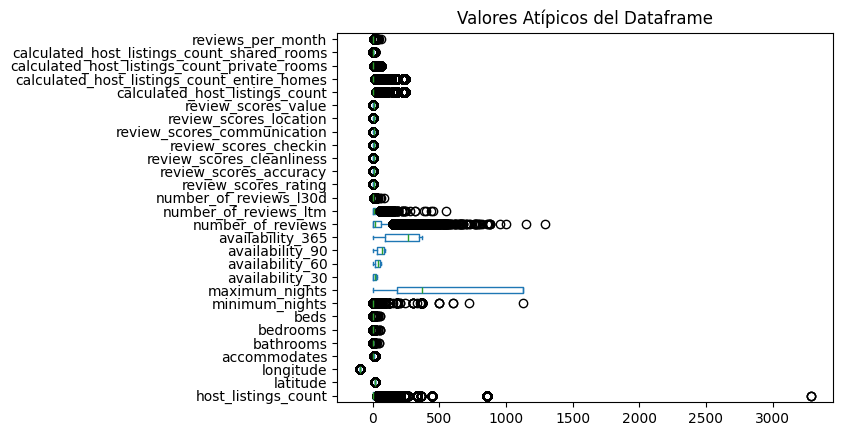

In [14]:
fig = plt.figure(figsize=(15,8))
cuantitativas_mx.plot(kind='box',vert=False)
plt.title('Valores Atípicos del Dataframe')
plt.show()

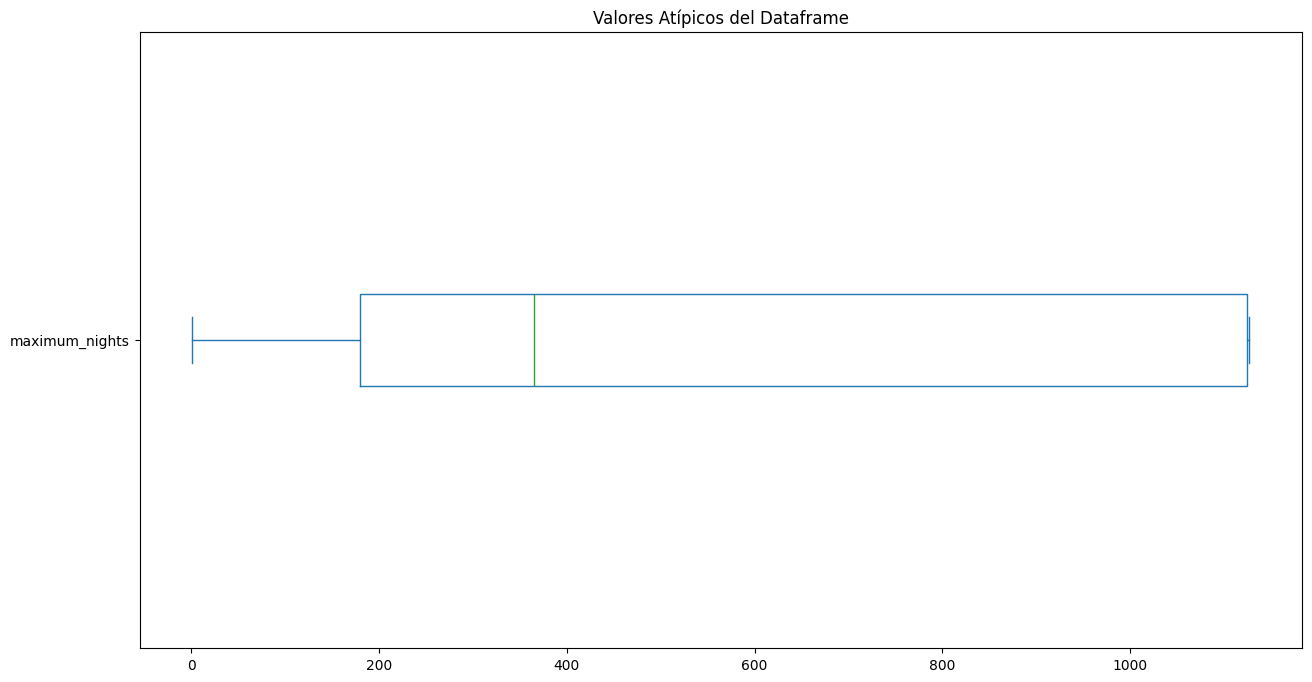

In [15]:
fig = plt.figure(figsize=(15,8))
cuantitativas_mx['maximum_nights'].plot(kind='box',vert=False)
plt.title('Valores Atípicos del Dataframe')
plt.show()

In [16]:
y = cuantitativas_mx

percentile25 = y.quantile(0.25)#Q1
percentile75 = y.quantile(0.75)#Q1
iqr = percentile75-percentile25

limite_superior_iqr = percentile75+1.5*iqr
limite_inferior_iqr = percentile25-1.5*iqr
print('Limite superior permitido',limite_superior_iqr)
print('Limite inferior permitido',limite_inferior_iqr)

Limite superior permitido host_listings_count                               33.500000
latitude                                          19.492980
longitude                                        -99.118304
accommodates                                       7.000000
bathrooms                                          2.250000
bedrooms                                           3.500000
beds                                               3.500000
minimum_nights                                     3.500000
maximum_nights                                  2542.500000
availability_30                                   62.000000
availability_60                                  116.500000
availability_90                                  167.500000
availability_365                                 739.000000
number_of_reviews                                148.000000
number_of_reviews_ltm                             55.000000
number_of_reviews_l30d                             5.000000
review_scores_

In [17]:
data_mx_iqr = cuantitativas_mx[(y<=limite_superior_iqr) & (y>=limite_inferior_iqr)]
data_mx_iqr

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,19.382830,NaN,2.0,1.0,1.0,1.0,1.0,7,28,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.00
1,12.0,19.411620,-99.177940,NaN,NaN,NaN,NaN,1.0,365,22,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,3.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,22,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,3.0,19.354480,-99.162170,2.0,1.0,1.0,1.0,3.0,180,2,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,3.0,19.354160,-99.164880,2.0,NaN,2.0,0.0,1.0,730,0,...,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,13.0,19.436998,-99.196733,2.0,1.0,1.0,1.0,1.0,365,29,...,NaN,NaN,NaN,NaN,NaN,12.0,0.0,NaN,0.0,0.00
26277,NaN,19.449230,-99.136170,3.0,1.0,2.0,2.0,1.0,365,30,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.00
26278,8.0,NaN,NaN,6.0,2.0,1.0,NaN,3.0,365,30,...,NaN,NaN,NaN,NaN,NaN,8.0,0.0,5.0,NaN,0.00
26279,NaN,19.400096,-99.172981,NaN,NaN,3.0,NaN,1.0,730,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00


In [18]:
nulos_mx = cr7.identificar_nulos(data_mx_iqr)
nulos_mx

('Nulos por columna:',
 host_listings_count                             3521
 latitude                                        1812
 longitude                                       2843
 accommodates                                    1320
 bathrooms                                       6081
 bedrooms                                         860
 beds                                            2312
 minimum_nights                                  3523
 maximum_nights                                     0
 availability_30                                    0
 availability_60                                    0
 availability_90                                    0
 availability_365                                   0
 number_of_reviews                               2177
 number_of_reviews_ltm                           1207
 number_of_reviews_l30d                           889
 review_scores_rating                            4261
 review_scores_accuracy                          4253
 revi

In [19]:
dataf_mx_iqr = data_mx_iqr.copy()
dataf_mx_iqr = dataf_mx_iqr.fillna(round(dataf_mx_iqr.mean(),1))
dataf_mx_iqr

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,19.382830,-99.200000,2.0,1.0,1.0,1.0,1.0,7,28,...,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,0.00
1,12.0,19.411620,-99.177940,3.0,1.2,1.4,1.3,1.0,365,22,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,3.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,22,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,3.0,19.354480,-99.162170,2.0,1.0,1.0,1.0,3.0,180,2,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,3.0,19.354160,-99.164880,2.0,1.2,2.0,0.0,1.0,730,0,...,4.80,4.90,4.90,4.90,4.80,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,13.0,19.436998,-99.196733,2.0,1.0,1.0,1.0,1.0,365,29,...,4.80,4.90,4.90,4.90,4.80,12.0,0.0,0.7,0.0,0.00
26277,6.2,19.449230,-99.136170,3.0,1.0,2.0,2.0,1.0,365,30,...,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,0.00
26278,8.0,19.400000,-99.200000,6.0,2.0,1.0,1.3,3.0,365,30,...,4.80,4.90,4.90,4.90,4.80,8.0,0.0,5.0,0.0,0.00
26279,6.2,19.400096,-99.172981,3.0,1.2,3.0,1.3,1.0,730,24,...,4.80,4.90,4.90,4.90,4.80,5.0,2.4,0.0,0.0,0.00


In [20]:
datos_limpios_mx = pd.concat([cualitativas_mx,dataf_mx_iqr],axis=1)
datos_limpios_mx

,id,scrape_id,last_scraped,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,20241227033128,2024-12-27,city scrape,153786,2010-06-28,0,0,0,f,...,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,0.00
1,44616,20241227033128,2024-12-28,city scrape,196253,2010-08-09,within an hour,92%,92%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,67703,20241227033128,2024-12-28,city scrape,334451,2011-01-04,within a few hours,100%,56%,t,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,70644,20241227033128,2024-12-27,city scrape,212109,2010-08-24,within an hour,100%,94%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,131610,20241227033128,2024-12-28,previous scrape,647454,2011-05-31,0,0,0,f,...,4.80,4.90,4.90,4.90,4.80,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,20241227033128,2024-12-28,city scrape,369403303,2020-09-26,within an hour,100%,100%,f,...,4.80,4.90,4.90,4.90,4.80,12.0,0.0,0.7,0.0,0.00
26277,1318960023050066631,20241227033128,2024-12-27,city scrape,525554527,2023-07-13,within an hour,100%,100%,f,...,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,0.00
26278,1318997244771691320,20241227033128,2024-12-27,city scrape,293574406,2019-09-10,within an hour,100%,92%,f,...,4.80,4.90,4.90,4.90,4.80,8.0,0.0,5.0,0.0,0.00
26279,1319078571963617776,20241227033128,2024-12-28,city scrape,35255741,2015-06-07,within an hour,100%,100%,t,...,4.80,4.90,4.90,4.90,4.80,5.0,2.4,0.0,0.0,0.00


In [21]:
nulos_mx = cr7.identificar_nulos(datos_limpios_mx)
nulos_mx

('Nulos por columna:',
 id                                              0
 scrape_id                                       0
 last_scraped                                    0
 source                                          0
 host_id                                         0
 host_since                                      0
 host_response_time                              0
 host_response_rate                              0
 host_acceptance_rate                            0
 host_is_superhost                               0
 host_has_profile_pic                            0
 host_identity_verified                          0
 neighbourhood_cleansed                          0
 property_type                                   0
 room_type                                       0
 bathrooms_text                                  0
 amenities                                       0
 price                                           0
 first_review                                    0
 last_re

In [22]:
datos_limpios_mx.to_csv('Datos_limpios_mexico.csv')